# 4-1 로지스틱 회귀

이제는 '한빛 럭키백'을 만든다~~ 

In [42]:
import pandas as pd

In [43]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [44]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [45]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [46]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [47]:
fish_target = fish['Species'].to_numpy()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler() #모델을 학습하는게 아니라 데이터 표준화 하기 위함
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [53]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [54]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [55]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #각 클래스에 대한 확률값을 반환
print(np.round(proba, decimals=4)) #소수점 네 번째 자리까지 표기, 5번째 반올림

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


위에서 나온 classes순서대로 첫번째 열이 Bream에 대한 확률이다!!  
이제 최근접 이웃에 해당하는지 다시 한 번 확인해보자

In [56]:
distances, indexes = kn.kneighbors(test_scaled[[3]]) #== test_scaled[3:4]
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


근데.. k=3이면 분모가 3이고 최종적으로 확률은 0/3 1/3 2/3 3/3 밖에 안 나온다... 더 좋은 방법이 없을까?? -> 로지스틱 회귀

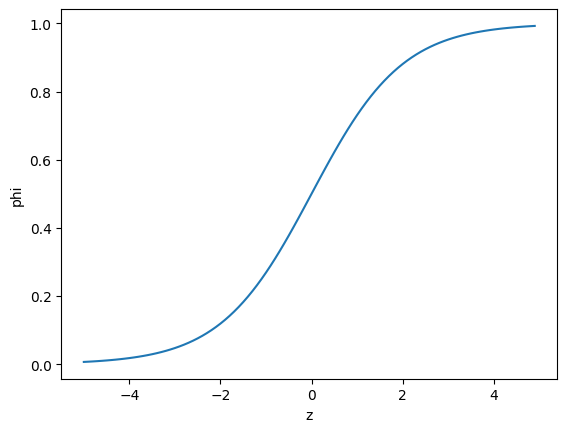

In [57]:
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [58]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


위와 같이 불리언 인덱싱을 사용해서 도미와 빙어의 행만 골라내자!!!

In [59]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

In [61]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [65]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [67]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [68]:
print(lr.classes_)

['Bream' 'Smelt']


아휴 힘들어 내일 할련다...